In [1]:
import cv2
import os
import math
import matplotlib.pyplot as plt
import numpy as np
from Thresholding import otsu
from Boundaries import boundaries_detection
from Boundaries import freeman_chain_code
from Borders import border_detection
from Boundaries import fourier_descriptors
class Image:
    def __init__(self,data,label,rotated=False,resized=False):
        self.data = data
        self.borderImage = None
        self.label = label
        self.boundary = None
        self.boundaryImage = None
        self.rotated = rotated
        self.resized = resized

    def __str__(self) -> str:
        return f"{self.data}"

    def getBoundaries(self)->None:
        binaryImage = otsu.otsu_image(self.data)
        self.borderImage = border_detection.canny_bordering(binaryImage)
        self.boundaryImage,self.boundary = boundaries_detection.moore_boundary_detection(self.borderImage)

    def getFreemanChain(self):
        if(self.boundary is None):
            self.getBoundaries()
        freemanChainCode = freeman_chain_code.calculate_chain_code(self.boundaryImage)
        self.freemanChainCode = freeman_chain_code.normalize_chain(freemanChainCode)

    def getArea(self):
        rows,columns = self.data.shape
        area = 0
        for r in range(rows):
            for c in range(columns):
                if(self.data[r][c] == 255):
                    area += 1
        self.area = area

    def getPerimeter(self):
        if(self.freemanChainCode is None):
            self.getFreemanChain()
        perimeter = 0
        for value in self.freemanChainCode:
            if(value%2 == 0):
                perimeter += 1
            else:
                perimeter += math.sqrt(2)
        self.perimeter = perimeter
        
    def getCompactness(self):
        if(self.perimeter is None):
            self.getPerimeter()
        if(self.area is None):
            self.getArea()
        self.compactness = self.perimeter**2 / self.area

    def getRectangularity(self):
        rows,columns = self.data.shape
        points = [math.inf,-1,math.inf,-1] # heighleast,heighmost,leftmost,rightmost
        for r in range(rows):
            for c in range(columns):
                if(self.data[r][c] == 255):
                    if(r < points[0]):
                        points[0] = r
                    if(r > points[1]):
                        points[1] = r
                    if(c < points[2]):
                        points[2] = c
                    if(c > points[3]):
                        points[3] = c
        areaR = (points[1]-points[0]) * (points[3]-points[2])
        self.rectangularity = self.area/areaR

    def getFourierDescriptors(self):
        if self.boundary is None:
            self.getBoundaries()
        self.fourierDescriptors = fourier_descriptors.fourier_descriptors(self.boundary.copy())

        

    def plotImage(self):
        plt.figure()
        plt.subplot(131)
        plt.imshow(self.data,cmap="gray")
        plt.subplot(132)
        plt.imshow(self.borderImage,cmap="gray")
        plt.subplot(133)
        plt.imshow(self.boundaryImage,cmap="gray")
        plt.show()


## Load data

In [2]:
images = []
imagesRotated = []
imagesResized = []
folder_path = 'images'
init_folders = os.listdir(folder_path)
for folder in init_folders:
    init_folder_path = os.path.join(folder_path, folder)
    cont = 0
    for image_path in os.listdir(init_folder_path):
        if(cont == 10):
            break
        image_folder = os.path.join(init_folder_path,image_path)
        image = cv2.imread(image_folder,cv2.IMREAD_GRAYSCALE)
        imageR = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
        imagesRZD = cv2.resize(image,(37,37),interpolation=cv2.INTER_NEAREST)
        images.append(Image(image,folder))
        imagesRotated.append(Image(imageR,folder,rotated=True))
        imagesResized.append(Image(imagesRZD,folder,resized=True))
        cont += 1

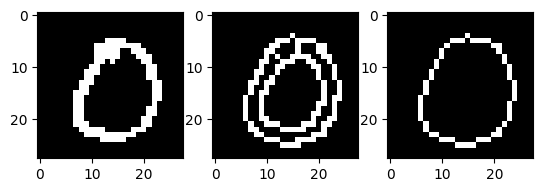

0.35526315789473684

In [3]:
image = images[12]
image.getFreemanChain()
image.plotImage()
image.getArea()
image.getPerimeter()
image.getCompactness()
image.getRectangularity()
image.rectangularity

Comparacion entre descriptores de Fourier
[927.        +1.03700000e+03j -11.40989841+1.04197002e+01j
 -70.41698314+7.79324511e+01j -64.87349699+4.37804295e+01j
 -44.98605375-3.93717283e+01j   7.64953061+1.93555533e+01j
  29.58845727-1.09282032e+01j   1.00839789+3.08373153e+00j
  -6.49763364+3.12400069e+00j -13.65685425-1.33226763e-15j]
[ 9.07000000e+02+9.27000000e+02j  7.15804998e+00-1.36937305e+01j
  1.04962885e+02+3.84852467e+00j  5.47821560e+00+7.80723111e+01j
 -3.74657856e+01-4.65853295e+01j -1.77331719e+01+1.08943736e+01j
 -2.01602540e+01+2.42583302e+01j  1.20970682e+00-3.01046108e+00j
  7.13278803e-01+7.17424955e+00j -1.36568542e+01+6.66133815e-16j]
[ 1.77800000e+03+1.95200000e+03j  7.57397156e+00+1.42585097e+01j
 -1.13781057e+02+1.36511203e+02j -1.26659335e+02+8.22453247e+01j
 -9.66475002e+01-8.31565939e+01j -3.74587510e-01+4.06179694e+01j
  5.78170428e+01-1.05288873e+01j  4.46787007e+00+1.05542407e+01j
  1.59594881e+00+3.29171027e+00j -2.52593999e+01-2.75642402e+00j
 -5.0121717

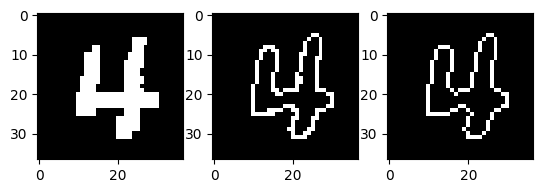

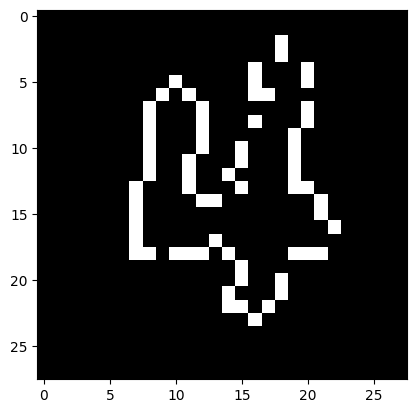

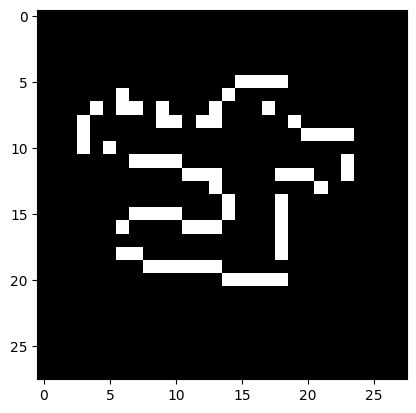

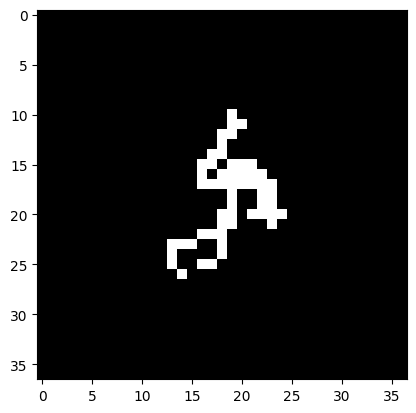

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [4]:
# Se obtienen los descriptores de Fourier
imagen = images[65]
imagen.getFourierDescriptors()

imagenRotada = imagesRotated[65]
imagenRotada.getFourierDescriptors()

imagenResized = imagesResized[65]
imagenResized.getFourierDescriptors()

print("Comparacion entre descriptores de Fourier")

print(imagen.fourierDescriptors[:10])
print(imagenRotada.fourierDescriptors[:10])
print(imagenResized.fourierDescriptors)

# Se grafican los descriptores de Fourier

# Se calculan los descriptores normalizados

descriptor_normal_InvarianteRot = fourier_descriptors.calculate_rotation_invariance(imagen.fourierDescriptors.copy())
descriptor_normal_InvarianteScale = fourier_descriptors.calculate_scale_invariance(imagen.fourierDescriptors.copy())
descriptor_rotado = fourier_descriptors.calculate_rotation_invariance(imagenRotada.fourierDescriptors.copy())
descriptor_resized = fourier_descriptors.calculate_scale_invariance(imagenResized.fourierDescriptors.copy())

print("Comparacion entre invarianza a rotación")
print("Original vs Rotado")
print(descriptor_normal_InvarianteRot[:10])
print(descriptor_rotado[:10])
print("Original vs Resized")
print(descriptor_normal_InvarianteScale[:10])
print(descriptor_resized[:10])

imagenResized.plotImage()

fourier_descriptors.plot_IDFT(imagen.fourierDescriptors, 1)
fourier_descriptors.plot_IDFT(imagenRotada.fourierDescriptors, 1)
fourier_descriptors.plot_IDFT(imagenResized.fourierDescriptors, 1, width=37, height=37)
